In [ ]:
#import tensorflow,keras dan Image Data generator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
#cek Versi TensorFlow
print(tf.__version__)

2.2.0


In [ ]:
import zipfile,os #import zip
local_zip = 'drive/My Drive/Submission_irvanmaulana/kertasguntingbatu.zip' #file zip
zip_ref = zipfile.ZipFile(local_zip, 'r') #baca file
zip_ref.extractall('/tmp') #ekstrak file zip
zip_ref.close() #tutup

base_dir = '/tmp/kertasguntingbatu' #folder asal
train_dir = os.path.join(base_dir, 'train') #folder train
validation_dir = os.path.join(base_dir, 'validasi') #folder validasi


In [ ]:
#melihat data folder train
os.listdir('/tmp/kertasguntingbatu/train')

['rock', 'scissor', 'paper']

In [ ]:
#melihat data folder validasi
os.listdir('/tmp/kertasguntingbatu/validasi')

['rock', 'scissor', 'paper']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
# membuat direktori ruangan rapi pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
# membuat direktori ruangan rapi pada direktori data training
train_scissor_dir = os.path.join(train_dir, 'scissor')
# membuat direktori ruangan rapi pada direktori data training
validation_paper_dir = os.path.join(validation_dir, 'paper')
# membuat direktori ruangan rapi pada direktori data training
validation_rock_dir = os.path.join(validation_dir, 'rock')
# membuat direktori ruangan rapi pada direktori data training
validation_scissor_dir = os.path.join(validation_dir, 'scissor')

In [ ]:
#Menampilkan jumlah gambar pada tiap folder
print('total gambar train rock :', len(os.listdir(train_rock_dir)))
print('total gambar train paper :', len(os.listdir(train_paper_dir)))
print('total gambar train scissors :', len(os.listdir(train_scissor_dir)))
print('total gambar validasi rock :', len(os.listdir(validation_rock_dir)))
print('total gambar validasi paper :', len(os.listdir(validation_paper_dir)))
print('total gambar validasi scissors :', len(os.listdir(validation_scissor_dir)))

total gambar train rock : 438
total gambar train paper : 438
total gambar train scissors : 438
total gambar validasi rock : 288
total gambar validasi paper : 274
total gambar validasi scissors : 312


In [ ]:
#Augmentasi gambar dengan image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode = 'nearest')


validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#Model Sequensial
model = tf.keras.models.Sequential([
    #konvolusi pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #konvolusi kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #konvolusi keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten hasil
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #512 neuro
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    #tf.keras.layers.Dense(1, activation='sigmoid')
])
#model.summary() #melihat rincian

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', #jenis optimisasi
              metrics=['accuracy'])

In [ ]:
      #Latih model yg ada
      model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, #jumlah epoch
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/20
25/25 [==============================] - 55s 2s/step - loss: 0.4117 - accuracy: 0.8425 - val_loss: 0.1760 - val_accuracy: 0.9563
Epoch 2/20
25/25 [==============================] - 53s 2s/step - loss: 0.4288 - accuracy: 0.8506 - val_loss: 0.1759 - val_accuracy: 0.9438
Epoch 3/20
25/25 [==============================] - 55s 2s/step - loss: 0.3762 - accuracy: 0.8575 - val_loss: 0.1785 - val_accuracy: 0.9187
Epoch 4/20
25/25 [==============================] - 53s 2s/step - loss: 0.4229 - accuracy: 0.8403 - val_loss: 0.0835 - val_accuracy: 0.9812
Epoch 5/20
25/25 [==============================] - 58s 2s/step - loss: 0.3319 - accuracy: 0.8725 - val_loss: 0.0920 - val_accuracy: 0.9688
Epoch 6/20
25/25 [==============================] - 55s 2s/step - loss: 0.4104 - accuracy: 0.8575 - val_loss: 0.0905 - val_accuracy: 0.9812
Epoch 7/20
25/25 [==============================] - 55s 2s/step - loss: 0.3139 - accuracy: 0.8963 - val_loss: 0.0633 - val_accuracy: 0.9812
Epoch 8/20
25/25 [==

Saving 1Frbe8cdOdkciOBg.png to 1Frbe8cdOdkciOBg (1).png
1Frbe8cdOdkciOBg.png
Kertas


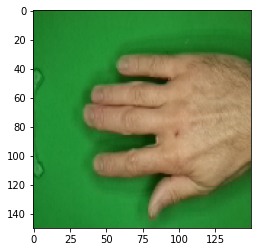

In [ ]:
import numpy as np #numpy
from google.colab import files #import file ke google colab
from keras.preprocessing import image #image processing
import matplotlib.pyplot as plt #menampilkan plot 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload() #upload

for fn in uploaded.keys():

# predicting images
  path = fn 
  img = image.load_img(path, target_size=(150,150)) #load gambar 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #fungsi if
  print(fn)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')
  else:
    print('Tidak Diketahui')

Saving nS9fHg3r4luGv0mF.png to nS9fHg3r4luGv0mF (2).png
nS9fHg3r4luGv0mF.png
Batu


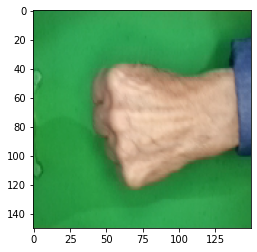

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')
  else:
    print('Tidak Diketahui')

Saving NR48QMe5e1gskpA9.png to NR48QMe5e1gskpA9 (2).png
NR48QMe5e1gskpA9.png
Gunting


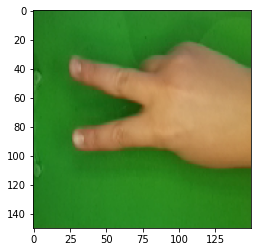

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')
  else:
    print('Tidak Diketahui')